<a href="https://www.kaggle.com/code/angelchaudhary/simpson-s-paradox-in-real-data?scriptVersionId=290389589" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How can the same dataset lead to opposite conclusions when analyzed at an aggregate level versus a subgroup level?

## Simpson’s Paradox in Real Data  
**Same data → opposite conclusions**

Simpson’s Paradox occurs when a trend observed in aggregated data reverses after the data is split into meaningful subgroups. In such cases, the same dataset can support completely opposite conclusions depending on how it is analyzed.

In this case study, we demonstrate Simpson’s Paradox using realistic data to show how hidden or ignored variables can distort insights. We begin by analyzing overall trends, then break the data down by a confounding factor to reveal the reversal.

The objective is to highlight why aggregate metrics can be misleading and why subgroup analysis is a critical step before drawing conclusions or making decisions based on data.


## Approach 

- We begin by analyzing the relationship between the primary variables using the aggregated dataset to establish the overall trend.
- We then introduce a confounding variable and divide the data into relevant subgroups.
- The same analysis is repeated within each subgroup to observe how the relationship changes.
- We compare aggregate-level results with subgroup-level results to identify whether a trend reversal occurs.
- Finally, we interpret the findings and discuss their implications for real-world data analysis and decision-making.


# LET'S DO IT!!!
![FUNNY GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcTdzbnk0OTIzNHJnNXE5eTA4amFzY3N3bHRmMzRwbjg2czZ1NmwxdyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/13HBDT4QSTpveU/giphy.gif)

## Aggregate-Level Analysis

We begin by analyzing the dataset in its aggregated form without accounting for any subgroups.  
At this stage, we examine the overall relationship between the two primary variables to identify the global trend. This represents a common real-world scenario where conclusions are drawn from summary statistics or overall correlations.

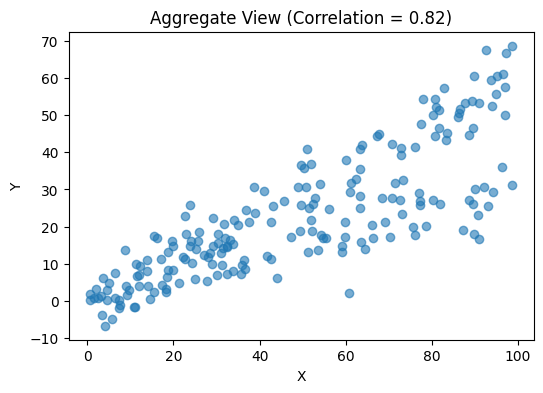

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Set seed for reproducibility
np.random.seed(42)

# Create synthetic data
n = 200
x = np.random.uniform(0, 100, n)
group = np.random.choice(['A', 'B'], size=n)

# Outcome variable (constructed so that paradox appears later)
y = np.where(
    group == 'A',
    0.3 * x + np.random.normal(0, 5, n),
    0.6 * x + np.random.normal(0, 5, n)
)

# Build DataFrame
df = pd.DataFrame({'x': x,'y': y,'group': group})

# Aggregate-level correlation
corr, _ = pearsonr(df['x'], df['y'])

# Plot aggregate relationship
plt.figure(figsize=(6, 4))
plt.scatter(df['x'], df['y'], alpha=0.6)
plt.title(f"Aggregate View (Correlation = {corr:.2f})")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Subgroup-Level Analysis

Next, we introduce the confounding variable and analyze the same relationship within each subgroup. By breaking the data down, we check whether the aggregate trend holds consistently across groups or if it behaves differently once the data is segmented.


In [2]:
# Group-wise correlation
group_corr = (
    df.groupby('group')
      .apply(lambda g: pearsonr(g['x'], g['y'])[0])
)

group_corr


/tmp/ipykernel_17/4290439202.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pearsonr(g['x'], g['y'])[0])


group
A    0.871682
B    0.965405
dtype: float64

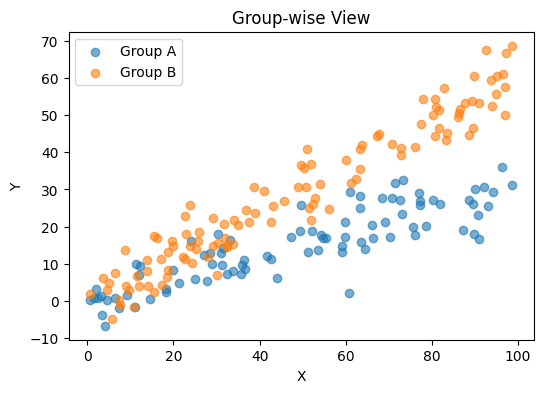

In [3]:
# Plot subgroup relationships
plt.figure(figsize=(6, 4))

for g, color in zip(['A', 'B'], ['tab:blue', 'tab:orange']):
    subset = df[df['group'] == g]
    plt.scatter(
        subset['x'],
        subset['y'],
        alpha=0.6,
        label=f"Group {g}",
        color=color
    )

plt.title("Group-wise View")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


## Aggregate vs Subgroup Comparison

At this point, we directly compare the aggregate-level result with the subgroup-level results. While the overall data suggested a single dominant trend, analyzing each subgroup separately reveals a different and potentially contradictory pattern. This comparison is what exposes Simpson’s Paradox.


In [4]:
# Display correlations clearly
print(f"Aggregate correlation: {corr:.2f}\n")

for g in group_corr.index:
    print(f"Correlation within Group {g}: {group_corr[g]:.2f}")


Aggregate correlation: 0.82

Correlation within Group A: 0.87
Correlation within Group B: 0.97


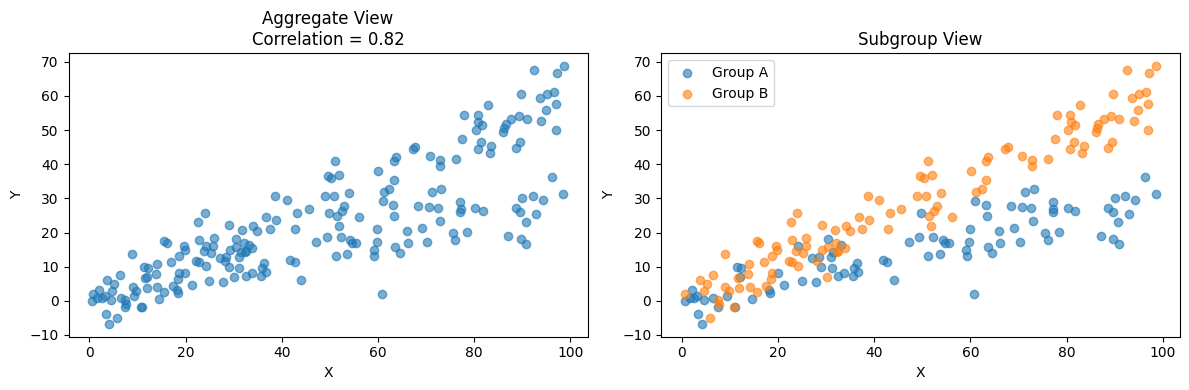

In [5]:
# visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Aggregate plot
axes[0].scatter(df['x'], df['y'], alpha=0.6)
axes[0].set_title(f"Aggregate View\nCorrelation = {corr:.2f}")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# Group-wise plot
for g, color in zip(['A', 'B'], ['tab:blue', 'tab:orange']):
    subset = df[df['group'] == g]
    axes[1].scatter(
        subset['x'],
        subset['y'],
        alpha=0.6,
        label=f"Group {g}",
        color=color
    )

axes[1].set_title("Subgroup View")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].legend()

plt.tight_layout()
plt.show()


## Why the Paradox Occurs

Simpson’s Paradox arises when a confounding variable influences both the independent and dependent variables. When data is aggregated, the effect of this hidden variable dominates the overall trend, masking what is happening within individual groups.

In this case, group membership changes the distribution of the data in such a way that the aggregate relationship does not reflect the true within-group behavior. As a result, the combined data produces a misleading conclusion even though each subgroup analysis is internally consistent.


## Key Takeaways

This case study highlights an important lesson for real-world data analysis:

Aggregate metrics can be misleading when underlying subgroups behave differently. Before drawing conclusions or building models, it is essential to examine data at multiple levels of granularity and explicitly check for confounding variables.

Simpson’s Paradox reminds us that correct analysis is not just about applying statistical tools, but about asking the right questions of the data.
